Definir bibliotecas a serem usadas

In [147]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

In [148]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.shape)
display(df.head())

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Entendo a natureza dos dados

In [149]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']
[]


Busca Por Dados Faltantes

In [150]:
## TODO
dados_faltantes_total = 0

for col in df.columns:
  dados_faltantes = df[col].isna().sum()
  dados_faltantes_total += dados_faltantes

  if (dados_faltantes > 0):
    porcentagem_local = len(df[col])/dados_faltantes


porcetagem_total = dados_faltantes_total/df.shape[0]
print('Total dados faltantes: {:.2f}%'.format(porcetagem_total) )

Total dados faltantes: 0.00%


Tratamento de dados irregulares e incosistentes nas colunas

In [151]:

i = 0
for col in df.columns:
  num_line_total = len(df[col])
  freq = df[col].value_counts()
  frq_relativa = freq / len(df[col])

  for fr in frq_relativa:
    if fr > 0.95:
      df.drop(columns=[col])

Tratamento de linhas iguais

In [152]:
line = []

for lineComp in df.index:
    linhaSelectComp = df.iloc[lineComp]
    if(linhaSelectComp[0] in line):
        df = df.drop[lineComp]
        line.append(linhaSelectComp[0])        

Tratamento de outliers nos dados

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


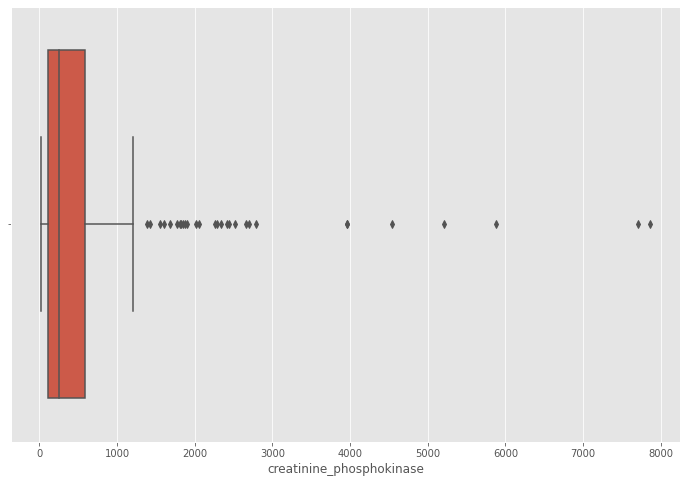

In [153]:
outliers = []

sns.boxplot(df["creatinine_phosphokinase"])
outlier = np.where(df['creatinine_phosphokinase']>1200)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)
    

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


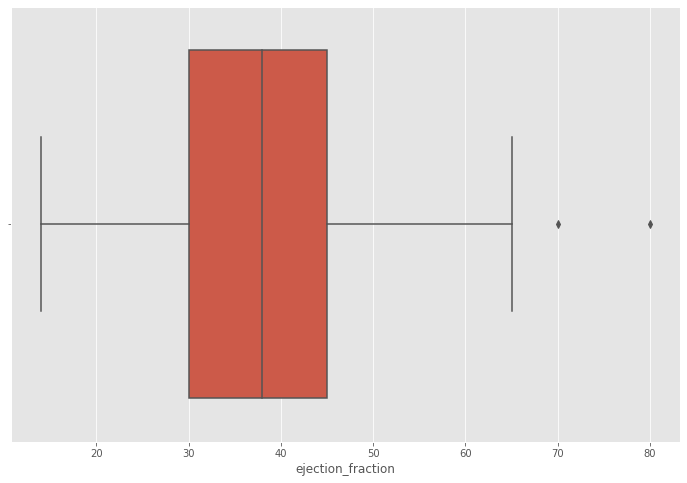

In [154]:

sns.boxplot(df["ejection_fraction"])
outlier = np.where(df['ejection_fraction']>65)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


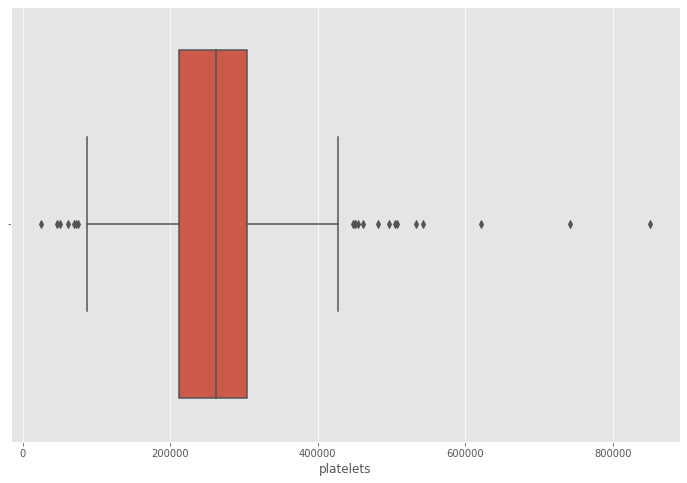

In [155]:
sns.boxplot(df["platelets"])
outlier = np.where(df['platelets']>420000)
outlier2 = np.where(df['platelets']<100000)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)
        
for i in range(len(outlier2[0])):
    if(not(i in outliers)):
        outliers.append(i)


C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


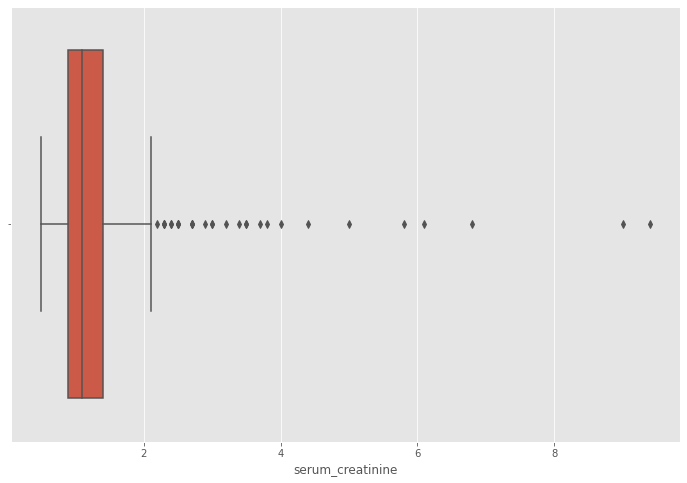

In [156]:
sns.boxplot(df["serum_creatinine"])
outlier = np.where(df['serum_creatinine']>2.2)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


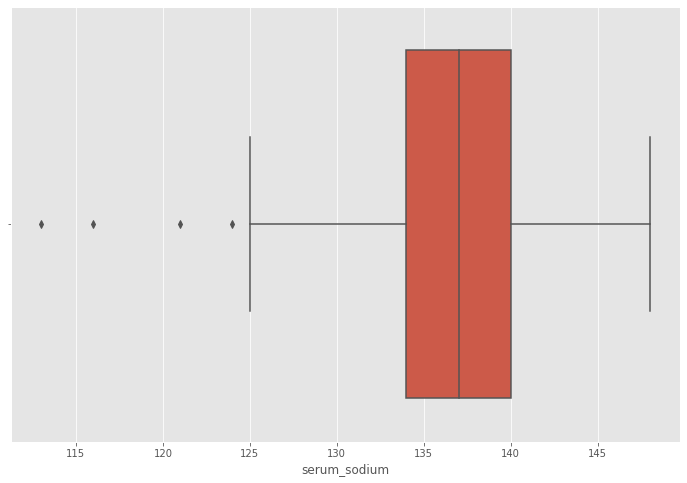

In [157]:
sns.boxplot(df["serum_sodium"])
outlier = np.where(df['serum_sodium']<125)

for i in range(len(outlier[0])):
    if(not(i in outliers)):
        outliers.append(i)
        

Remover outliers

In [158]:
df = df.drop(outliers)
